In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('COVID-19-time-series-clean-complete.csv')
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Temp'] = data['Date'].map(lambda date: 100*date.year + date.month)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Temp
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [10]:
need_month=data.loc[(data['Temp']==202004)]
need_month

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Temp
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
...,...,...,...,...,...,...,...,...,...,...,...
19295,19295,2020-04-30,Vietnam,270,0,219.0,51.0,0,0,-3,202004
19296,19296,2020-04-30,West Bank and Gaza,344,2,76.0,266.0,0,0,5,202004
19297,19297,2020-04-30,Yemen,6,2,1.0,3.0,0,2,1,202004
19298,19298,2020-04-30,Zambia,106,3,55.0,48.0,9,0,1,202004


In [17]:
t=need_month.sort_values(by=['Confirmed'],ascending=False)
t.head(8)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Temp
19286,19286,2020-04-30,US,1081105,66184,153947.0,860974.0,29205,2181,33227,202004
19093,19093,2020-04-29,US,1051900,64003,120720.0,867177.0,26459,2398,4784,202004
18900,18900,2020-04-28,US,1025441,61605,115936.0,847900.0,24575,2228,4512,202004
18707,18707,2020-04-27,US,1000866,59377,111424.0,830065.0,23715,1495,4436,202004
18514,18514,2020-04-26,US,977151,57882,106988.0,812281.0,26488,1413,6616,202004
18321,18321,2020-04-25,US,950663,56469,100372.0,793822.0,30380,1724,1293,202004
18128,18128,2020-04-24,US,920283,54745,99079.0,766459.0,32327,2178,18876,202004
17935,17935,2020-04-23,US,887956,52567,80203.0,755186.0,33612,2435,2837,202004


In [23]:
x = need_month.groupby('Country/Region')['Confirmed'].sum().reset_index().sort_values(by=['Confirmed'], ascending=False)
x.head(8)

,Country/Region,Confirmed
179,US,19960815
162,Spain,5236777
84,Italy,4928524
65,Germany,3942925
61,France,3456319
183,United Kingdom,3328344
36,China,2500143
80,Iran,2255837


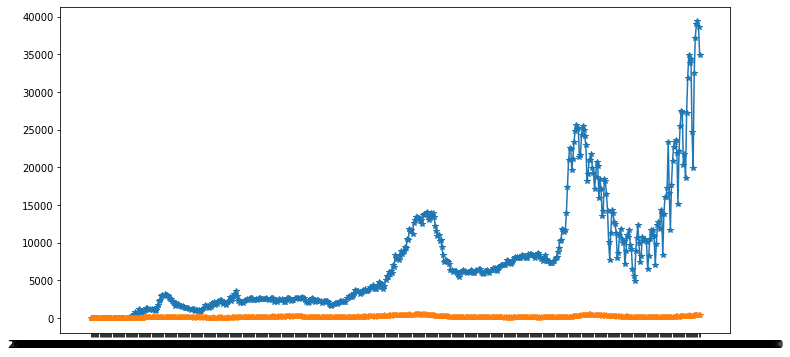

In [43]:
irn = data.loc[(data['Country/Region'] == 'Iran')]
plt.figure(figsize=(12,6))
plt.plot(irn['Date'].to_numpy(dtype=str),irn['New cases'],marker='*')
plt.plot(irn['Date'].to_numpy(dtype=str),irn['New deaths'],marker='*')